In [150]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
def normalize_data(df):
  normalize_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
  for col in normalize_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
  return df

In [153]:
def process_data(df):
  df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna('S')

  df['Sex'] = df['Sex'].map(df['Sex'].value_counts())
  df['Embarked'] = df['Embarked'].map(df['Embarked'].value_counts())

  # df = normalize_data(df)
  df = df.sample(frac=1)
  return df

In [154]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\User\AppData\Local\Temp\ipykernel_9592\4070944172.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu')


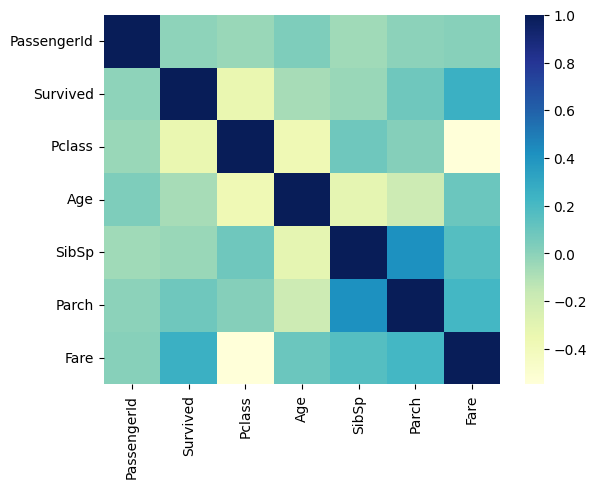

In [155]:
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

In [156]:
df = process_data(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
526,1,2,314,50.000000,0,0,10.5000,646
617,0,3,314,26.000000,1,0,16.1000,646
736,0,3,314,48.000000,1,3,34.3750,646
611,0,3,577,29.699118,0,0,7.0500,646
421,0,3,577,21.000000,0,0,7.7333,77


In [157]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,484.315376,29.699118,0.523008,0.381594,32.204208,506.699214
std,0.486592,0.836071,125.711389,13.002015,1.102743,0.806057,49.693429,227.406762
min,0.000000,1.000000,314.000000,0.420000,0.000000,0.000000,0.000000,77.000000
25%,0.000000,2.000000,314.000000,22.000000,0.000000,0.000000,7.910400,168.000000
50%,0.000000,3.000000,577.000000,29.699118,0.000000,0.000000,14.454200,646.000000
75%,1.000000,3.000000,577.000000,35.000000,1.000000,0.000000,31.000000,646.000000
max,1.000000,3.000000,577.000000,80.000000,8.000000,6.000000,512.329200,646.000000


## model

In [158]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(7,)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Bat  (None, 7)                28        
 chNormalization)                                                
                                                                 
 dense_54 (Dense)            (None, 64)                512       
                                                                 
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,765
Trainable params: 4,751
Non-trainable params: 14
_________________________________________________________________


In [159]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(df.drop('Survived', axis=1), df['Survived'], epochs=100, validation_split=0.25)

Epoch 1/100


c:\Users\User\Documents\programming\kaggle\titanic\venv\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


21/21 [==============================] - 1s 9ms/step - loss: 0.5805 - accuracy: 0.7635 - val_loss: 1.7632 - val_accuracy: 0.6592
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7859 - val_loss: 1.5821 - val_accuracy: 0.6592
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7964 - val_loss: 1.2299 - val_accuracy: 0.6637
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7949 - val_loss: 0.9817 - val_accuracy: 0.6592
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7949 - val_loss: 0.7608 - val_accuracy: 0.7040
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8069 - val_loss: 0.6181 - val_accuracy: 0.7489
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8069 - val_loss: 0.5319 - val_accuracy: 0.7803
Epoch 8/100
21/21 [======

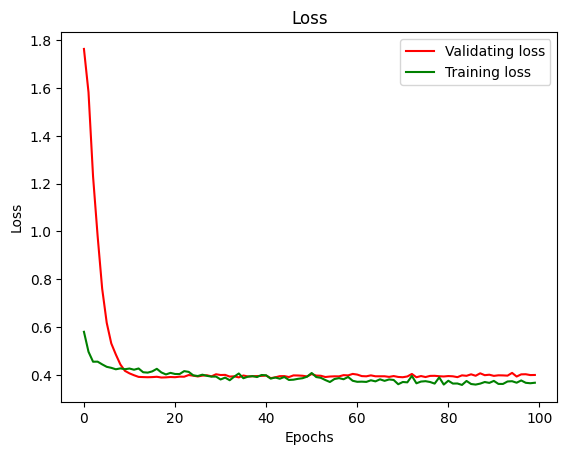

In [160]:
plt.plot(history.epoch, history.history["val_loss"], 'r', label='Validating loss')
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

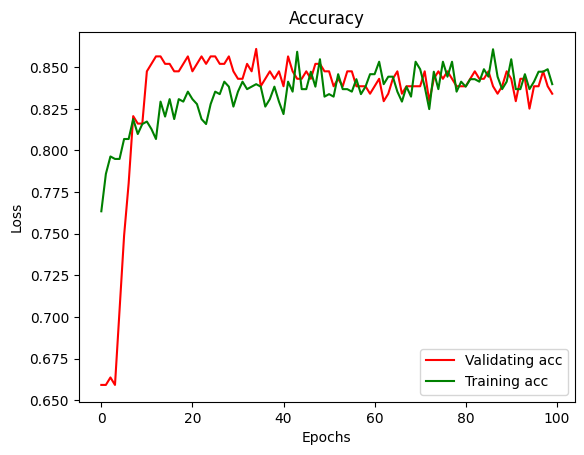

In [161]:
plt.plot(history.epoch, history.history["val_accuracy"], 'r', label='Validating acc')
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [162]:
model.evaluate(df.drop('Survived', axis=1), df['Survived'])

28/28 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8608


[0.3508567214012146, 0.860830545425415]

In [163]:
test_df = pd.read_csv('data/test.csv')
processed_test_df = process_data(test_df)
processed_test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
168,1,152,30.27259,0,0,27.7208,102
185,2,266,40.00000,0,0,16.0000,270
38,3,266,25.00000,0,0,9.5000,270
215,1,266,42.00000,0,0,42.5000,270
180,2,266,30.00000,0,0,13.0000,270
...,...,...,...,...,...,...,...
277,2,266,40.00000,1,0,26.0000,270
130,3,266,32.00000,0,0,8.0500,270
238,2,152,18.00000,1,1,13.0000,270
129,3,266,24.00000,0,0,8.0500,270


In [164]:
predictions = model.predict(processed_test_df)
predictions = np.round(predictions).astype(int).reshape(-1)
predictions

14/14 [==============================] - 0s 1000us/step


array([          1,           1,           1,           1,           1,
                 1,           0,           1,           1,           1,
                 1,           1,           1, -2147483648,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,
                 1,           1,           1,           1,      

In [165]:
with open('output/submission.csv', 'w') as f:
  f.write('PassengerId,Survived\n')
  for row in zip(test_df['PassengerId'], predictions):
    f.write(f'{row[0]},{row[1]}\n')